In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
from operator import itemgetter
import pandas as pd
from sklearn.cross_validation import train_test_split

import csv
#import nupic

In [3]:
traindf = pd.read_csv('./lab_data/24chan/24chan_train1.csv', header = 0, skiprows = [1,2])
testdf = pd.read_csv('./lab_data/24chan/24chan_test1.csv', header = 0, skiprows = [1,2])

In [4]:
traindf.describe()

,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,...,field16,field17,field18,field19,field20,field21,field22,field23,field24,classification
count,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000,...,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000,67480.000000
mean,-3283.917799,-3658.287853,-5900.545595,192.018548,269.597454,-940.131160,-10884.435966,-8987.949700,-49178.084116,-8079.236128,...,-31609.041948,-1561.742850,1093.703688,-118.842202,-7244.787349,-3434.940191,-6818.229873,-13077.514964,-0.017879,1.002238
std,182.540156,129.933681,82.244385,166.008104,22.352831,33.169965,145.501240,177.245078,2161.673437,116.426714,...,763.512907,277.183027,31.741405,90.313884,90.445562,265.782947,90.625826,168.937326,0.000218,0.817573
min,-3648.394287,-3930.258789,-5998.581543,-147.789719,0.000000,-1015.716797,-11086.375000,-9336.948242,-52709.589844,-8247.095703,...,-32720.804688,-2177.864258,0.000000,-292.736298,-7302.904297,-3948.301025,-6918.311035,-13195.216797,-0.017881,0.000000
25%,-3428.614258,-3725.950500,-5934.583984,80.555679,255.453583,-946.444275,-10907.743652,-9095.997070,-50648.536133,-8131.438477,...,-32245.195312,-1762.774567,1063.616608,-182.220337,-7257.968262,-3635.707458,-6848.019531,-13137.156250,-0.017881,0.000000
50%,-3259.554565,-3633.615356,-5908.834961,186.225769,275.284058,-930.368896,-10868.382812,-8958.541992,-50310.025391,-8080.914551,...,-31583.592773,-1522.278748,1103.746948,-108.951332,-7244.414062,-3417.483032,-6814.849609,-13062.527832,-0.017881,1.000000
75%,-3126.454346,-3554.476746,-5866.902832,352.397552,286.889069,-919.336060,-10847.944336,-8881.008789,-47898.653320,-8019.519043,...,-31054.540527,-1318.301300,1114.654541,-35.476685,-7233.435059,-3209.598328,-6785.666992,-13027.578125,-0.017881,2.000000
max,0.000000,0.000000,0.000000,453.811890,314.426422,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1144.909912,27.501583,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


In [5]:
testdf.describe()

,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,...,field16,field17,field18,field19,field20,field21,field22,field23,field24,classification
count,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,...,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000,33237.000000
mean,-3283.618589,-3657.969878,-5900.071942,192.241976,269.884967,-939.958147,-10883.976405,-8987.749112,-49189.440267,-8079.028383,...,-31610.939759,-1561.394229,1094.027147,-118.518666,-7244.467050,-3434.545786,-6818.006100,-13077.330385,-0.017879,1.006890
std,181.600600,129.382433,82.787074,165.165003,22.323863,32.884742,146.383976,177.202978,2150.122295,116.886556,...,762.481271,275.710929,31.727194,89.865332,91.088712,264.389406,91.140984,169.991482,0.000219,0.820358
min,-3647.983154,-3928.130859,-5998.241699,-146.377090,0.000000,-1015.770447,-11088.269531,-9330.564453,-52484.554688,-8252.370117,...,-32720.929688,-2144.497559,0.000000,-291.788574,-7302.332031,-3941.327393,-6914.448730,-13191.049805,-0.017881,0.000000
25%,-3426.754395,-3724.586914,-5934.297852,82.021950,255.900620,-946.229675,-10906.452148,-9094.494141,-50644.648438,-8130.884277,...,-32248.324219,-1759.833130,1064.407837,-179.028503,-7257.539062,-3630.638184,-6847.912109,-13136.530273,-0.017881,0.000000
50%,-3259.491943,-3633.964111,-5908.030273,185.823441,275.659546,-930.386780,-10868.024414,-8958.506836,-50311.554688,-8080.816406,...,-31576.734375,-1522.940430,1104.086670,-108.969208,-7244.074219,-3417.152100,-6814.294922,-13061.625000,-0.017881,1.000000
75%,-3128.510742,-3555.554199,-5866.474121,351.190552,287.157288,-919.640076,-10847.783203,-8881.956055,-47954.750000,-8019.608398,...,-31058.298828,-1320.058105,1114.690308,-35.530327,-7233.184570,-3210.747314,-6785.666992,-13027.650391,-0.017881,2.000000
max,0.000000,0.000000,0.000000,452.864166,314.462189,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1145.017090,28.306246,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


/home/polina/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
/home/polina/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


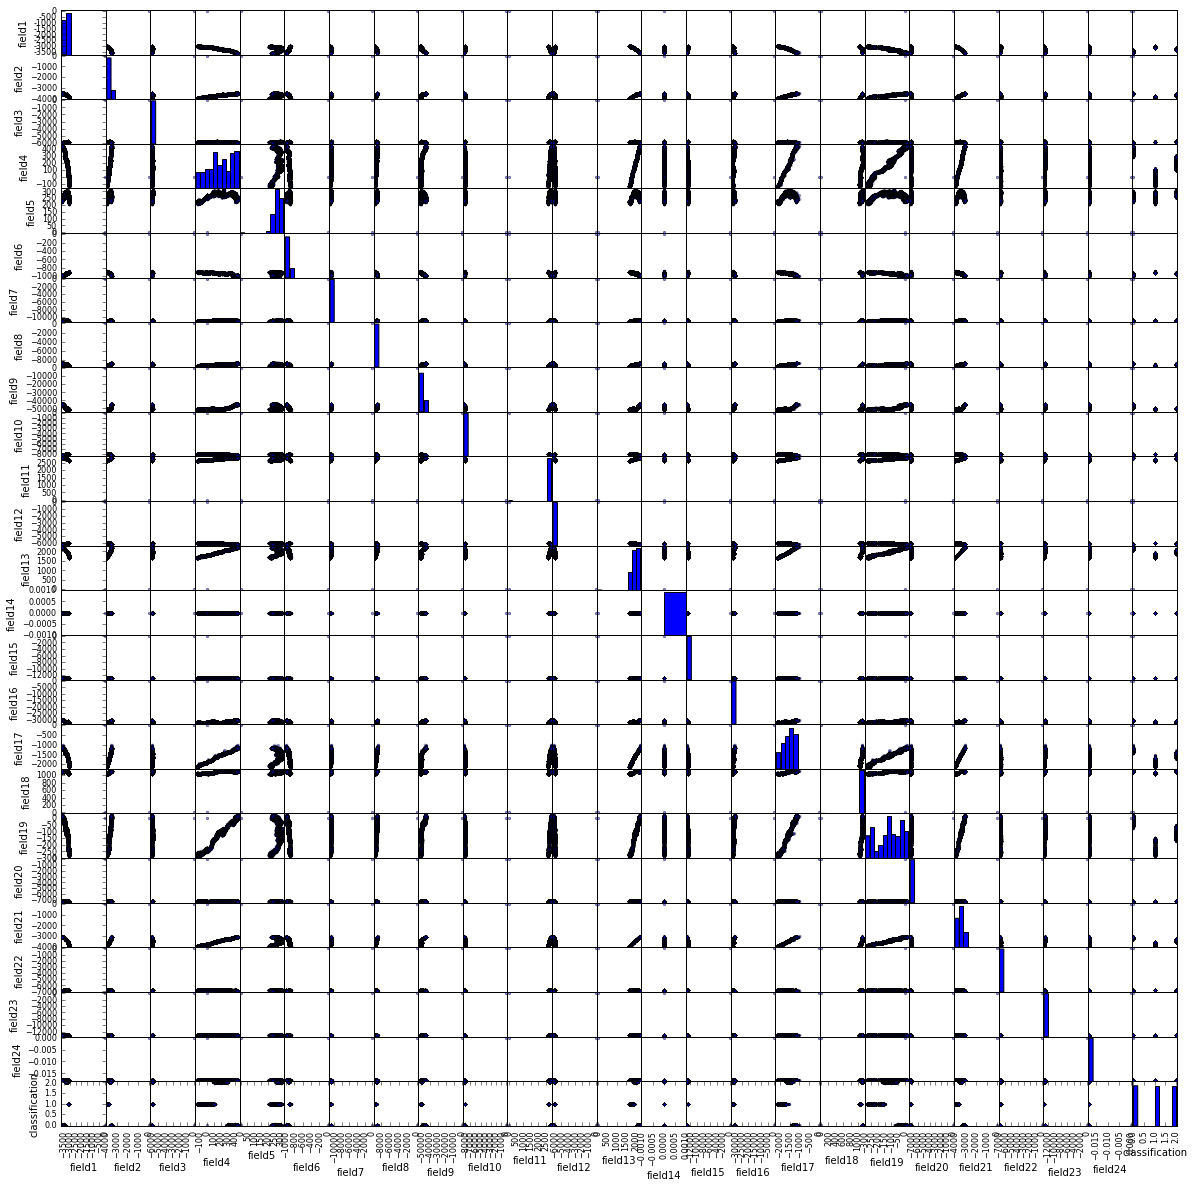

In [4]:
#from pandas.tools.plotting import scatter_matrix
pd.tools.plotting.scatter_matrix(traindf, alpha=0.05, figsize=(20, 20));

Как видно из scatter plot'а и таблицы корреляций ниже, сильно закоррелированными являются:
\begin{itemize}
 \item field1 \& field4
 \item
 \item
 \item
 \item
\end{itemize}

In [43]:
(traindf.ix[:, :ncols]).corr()

,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,...,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24
field1,1.000000,-0.786860,0.361887,-0.952846,-0.154622,0.890942,-0.005887,-0.591896,-0.768642,0.689213,...,0.520734,-0.548175,-0.927198,-0.719425,-0.929757,0.218651,-0.903190,0.533970,-0.087378,0.219019
field2,-0.786860,1.000000,0.263383,0.923491,0.353713,-0.589186,0.600546,0.944225,0.780783,-0.153241,...,0.028009,0.751690,0.953885,0.573709,0.929840,0.376423,0.971290,0.052488,0.608856,0.342771
field3,0.361887,0.263383,1.000000,-0.106389,0.189877,0.501515,0.888461,0.506707,-0.033919,0.831582,...,0.864303,0.269010,-0.013904,-0.260932,-0.050352,0.924136,0.057823,0.922198,0.794392,0.873441
field4,-0.952846,0.923491,-0.106389,1.000000,0.339738,-0.786934,0.262686,0.766503,0.783177,-0.503550,...,-0.337621,0.654891,0.993041,0.735376,0.987005,0.014631,0.981979,-0.324842,0.292850,-0.014082
field5,-0.154622,0.353713,0.189877,0.339738,1.000000,-0.019458,0.193110,0.210102,-0.129446,-0.152999,...,-0.223635,-0.008131,0.337901,0.603400,0.365398,-0.001767,0.305752,-0.082083,-0.046182,-0.146836
field6,0.890942,-0.589186,0.501515,-0.786934,-0.019458,1.000000,0.182041,-0.385707,-0.727258,0.718472,...,0.563800,-0.409662,-0.758084,-0.536561,-0.757343,0.347634,-0.725785,0.604894,0.097319,0.345057
field7,-0.005887,0.600546,0.888461,0.262686,0.193110,0.182041,1.000000,0.805118,0.349540,0.670802,...,0.775874,0.567750,0.349546,-0.077975,0.298225,0.942398,0.417386,0.805696,0.949138,0.910725
field8,-0.591896,0.944225,0.506707,0.766503,0.210102,-0.385707,0.805118,1.000000,0.748502,0.143725,...,0.333889,0.785168,0.823022,0.341923,0.782444,0.639138,0.865621,0.344697,0.824799,0.617354
field9,-0.768642,0.780783,-0.033919,0.783177,-0.129446,-0.727258,0.349540,0.748502,1.000000,-0.191832,...,0.003959,0.851249,0.786281,0.205886,0.761830,0.224359,0.808603,-0.063586,0.480582,0.276968
field10,0.689213,-0.153241,0.831582,-0.503550,-0.152999,0.718472,0.670802,0.143725,-0.191832,1.000000,...,0.962133,0.117376,-0.431769,-0.699277,-0.473395,0.828271,-0.355976,0.954870,0.638775,0.844823


### Fisher LDA

In [6]:
from sklearn.lda import LDA

In [30]:
ncols = traindf.shape[1] - 1
print ncols
X, y = (traindf.ix[:, :ncols]).as_matrix(), np.array(traindf['classification'])
clf_lda = LDA()
clf_lda.fit(X, y)
test_predict = clf_lda.predict((testdf.ix[:, :ncols]).as_matrix())

24


/home/polina/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [42]:
print 'Number of wrong classified observations', np.sum(test_predict != np.array(testdf['classification']))
#print 'Mean Accuracy', clf_lda.score((testdf.ix[:, :ncols]).as_matrix(), np.array(testdf['classification']))

Number of wrong classified observations 175
Mean Accuracy 0.00526521647561


In [41]:
train_error = np.mean(clf_lda.predict(X) != np.array(traindf['classification']))
test_error  = np.mean(test_predict != np.array(testdf['classification']))
print train_error, test_error

0.0051867219917 0.00526521647561
